In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib

# Libraries for modeling & evaluation
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# 01 Anies

In [ ]:
df_anies = pd.read_excel('Data Labelling Anies_2.xlsx')
df_anies

,Clean,Tokenized 2,Polarity Score,polarity
0,ikut video desak anies potong video klasifikas...,"['ikut', 'video', 'desak', 'anies', 'potong', ...",-8,Negatif
1,marco karundeng hebat ayam sayur,"['marco', 'karundeng', 'hebat', 'ayam', 'sayur']",0,Positif
2,senang anies senang,"['senang', 'anies', 'senang']",2,Positif
3,capres pilih nomor,"['capres', 'pilih', 'nomor']",-2,Negatif
4,prabowo gibran dukung anies wakil cak imin hal...,"['prabowo', 'gibran', 'dukung', 'anies', 'waki...",-2,Negatif
...,...,...,...,...
1602,pilpres pilih prabowohatta suka jokowi pdi pil...,"['pilpres', 'pilih', 'prabowohatta', 'suka', '...",-4,Negatif
1603,infrastuktur olah ikan nelayan perhati anies,"['infrastuktur', 'olah', 'ikan', 'nelayan', 'p...",0,Positif
1604,anies baswedan usaha stabil naik dapat nelayan,"['anies', 'baswedan', 'usaha', 'stabil', 'naik...",1,Positif
1605,maaf sexy salah asam sulfat nyinyir anies tua ...,"['maaf', 'sexy', 'salah', 'asam', 'sulfat', 'n...",-31,Negatif


In [ ]:
X = df_anies['Clean']
y = df_anies['polarity']

In [ ]:
X

0       ikut video desak anies potong video klasifikas...
1                        marco karundeng hebat ayam sayur
2                                     senang anies senang
3                                      capres pilih nomor
4       prabowo gibran dukung anies wakil cak imin hal...
                              ...                        
1602    pilpres pilih prabowohatta suka jokowi pdi pil...
1603         infrastuktur olah ikan nelayan perhati anies
1604       anies baswedan usaha stabil naik dapat nelayan
1605    maaf sexy salah asam sulfat nyinyir anies tua ...
1606     anies presidenya nelayan rasa manfaat ide beliau
Name: Clean, Length: 1607, dtype: object

In [ ]:
y

0       Negatif
1       Positif
2       Positif
3       Negatif
4       Negatif
         ...   
1602    Negatif
1603    Positif
1604    Positif
1605    Negatif
1606    Positif
Name: polarity, Length: 1607, dtype: object

In [ ]:
y.value_counts()

polarity
Positif    810
Negatif    797
Name: count, dtype: int64

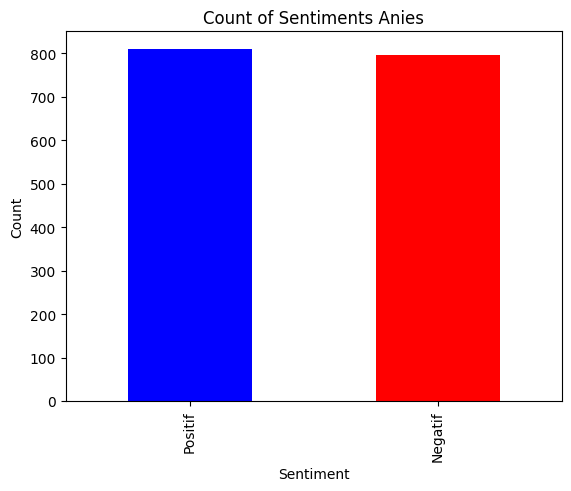

In [ ]:
import matplotlib.pyplot as plt

# Contoh data
data = y.value_counts()

# Membuat diagram batang
data.plot(kind='bar', color=['blue','red'])

# Menambahkan judul dan label
plt.title('Count of Sentiments Anies')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Menampilkan diagram batang
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Mengubah data y dari string ke angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Pastikan bahwa 'Negatif' menjadi 0 dan 'Positif' menjadi 1
# Jika tidak, maka bisa disesuaikan secara manual
if label_encoder.classes_[0] != 'Negatif':
    y_encoded = 1 - y_encoded

In [ ]:
y_encoded

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# Menghitung jumlah kemunculan setiap nilai dalam y_encoded
unique_values, counts = np.unique(y_encoded, return_counts=True)

# Membuat dictionary untuk menampilkan hasil dengan lebih jelas
value_counts = dict(zip(unique_values, counts))

# Mencetak hasil
print('Value counts of y_encoded:', value_counts)

Value counts of y_encoded: {0: 797, 1: 810}


# Feature Extraction (TF-DF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
response = tf_idf.fit_transform(X)
print(response)

  (0, 1015)	0.26845166585326674
  (0, 45)	0.2542964699962746
  (0, 126)	0.16134284359463114
  (0, 2576)	0.2442531987044474
  (0, 1645)	0.22005473155562805
  (0, 974)	0.26845166585326674
  (0, 1757)	0.2542964699962746
  (0, 1231)	0.23009800284745527
  (0, 1150)	0.20051797999677953
  (0, 1362)	0.2442531987044474
  (0, 1272)	0.15823759714956662
  (0, 3351)	0.2442531987044474
  (0, 1696)	0.26845166585326674
  (0, 2678)	0.2542964699962746
  (0, 154)	0.038860480481546694
  (0, 780)	0.14433087927072702
  (0, 3605)	0.39171252881361746
  (0, 1277)	0.20589953569863595
  (1, 2990)	0.3889941871076494
  (1, 266)	0.47344299181341976
  (1, 1202)	0.3534707766682052
  (1, 1568)	0.49979679167677393
  (1, 2023)	0.49979679167677393
  (2, 3054)	0.9954551886671573
  (2, 154)	0.09523112598113234
  :	:
  (1605, 568)	0.2397188432737437
  (1605, 3099)	0.2397188432737437
  (1605, 1003)	0.45415740254279685
  (1605, 3487)	0.19650191231915362
  (1605, 2466)	0.16793707471731364
  (1605, 2947)	0.15427472881030146
  (

In [ ]:
#melihat jumlah fitur

print(len(tf_idf.get_feature_names_out()))

3710


In [ ]:
#melihat fitur-fitur apa saja yang ada di dalam corpus

print(tf_idf.get_feature_names_out())

['aaamiin' 'aamiiin' 'aamiin' ... 'zonasi' 'zuhur' 'zulfan']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaamiin,aamiiin,aamiin,abah,abai,abalabal,abdi,abg,abis,abizzzz,...,your,yra,ytta,yusril,zaman,zarry,zionis,zonasi,zuhur,zulfan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle_anies', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# Chi Square


In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = data_tf_idf
y = y_encoded

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from scipy.stats import chi2 as chi2_scipy

In [ ]:
# Parameter alpha untuk uji Chi-Square
alpha = 0.5

# Menghitung jumlah kelas dalam target
num_classes = len(np.unique(y))

# Menghitung degrees of freedom (df) untuk uji Chi-Square
df_chi2 = num_classes - 1

# Menghitung nilai kritis dari distribusi Chi-Square
critical_value = chi2_scipy.ppf(1 - alpha, df_chi2)

# Menghitung nilai Chi-Square dan nilai p untuk setiap fitur
chi2_values, p_values = chi2(X, y)

# Menentukan fitur yang dipilih berdasarkan taraf signifikansi alpha
selected_feature_indices = np.where(p_values <= alpha)[0]

# Mengambil fitur yang dipilih dari dataset asli
X_selected_features = np.take(X, selected_feature_indices, axis=1)

# Mencetak hasil
print('Degrees of freedom:', df_chi2)
print('Critical value:', critical_value)
print('Original feature number:', X.shape[1])
print('Selected feature number:', X_selected_features.shape[1])

Degrees of freedom: 1
Critical value: 0.454936423119572
Original feature number: 3710
Selected feature number: 1270


In [ ]:
# Menghitung jumlah kelas dalam target
num_classes = len(np.unique(y))

# Menghitung degrees of freedom (df) untuk uji Chi-Square
df_chi2 = num_classes - 1

# Menghitung nilai kritis dari distribusi Chi-Square
critical_value = chi2_scipy.ppf(1 - alpha, df_chi2)

# Menghitung jumlah fitur asli
original_feature_number = X_tf_idf.shape[1]

# Menghitung jumlah fitur yang dipilih
selected_feature_number = len(selected_feature_indices)

# Membuat dataframe fitur terpilih dengan p-value <= 0.5 (FITUR TERPILIH)
feature_names = tf_idf.get_feature_names_out()
selected_df = pd.DataFrame({
    'Fitur': feature_names[selected_feature_indices],
    'Chi-Square': chi2_values[selected_feature_indices],
    'P-Value': p_values[selected_feature_indices]
})
selected_df = selected_df.sort_values(by='P-Value')

# Menampilkan informasi tambahan
'Degrees of freedom:', df_chi2
'Original feature number:', original_feature_number
'Selected feature number:', selected_feature_number

# Mencetak selected_df dengan nilai kritis yang benar
selected_df



,Fitur,Chi-Square,P-Value
2607,pilih,16.964476,0.000038
2591,pesona,14.191472,0.000165
71,akhirat,13.196266,0.000281
3585,very,12.966963,0.000317
2130,milik,11.886477,0.000565
...,...,...,...
278,baca,0.000215,0.988295
2051,mati,0.000187,0.989102
3333,televisi,0.000183,0.989196
6,abdi,0.000181,0.989267


In [ ]:
# Pilih fitur dengan nilai p-value lebih dari sama dengan nilai taraf (alpha) 0.5 (FITUR TERBUANG)
nonselected_feature_indices = np.where(p_values > alpha)[0]
nonselected_df = pd.DataFrame({
    'Fitur': feature_names[nonselected_feature_indices],
    'ChiSquare': chi2_values[nonselected_feature_indices],
    'PValue': p_values[nonselected_feature_indices]
})
nonselected_df = nonselected_df.sort_values(by='PValue')

# Menampilkan Dataframe dengan fitur yang memiliki p-value > 0.5
nonselected_df


,Fitur,ChiSquare,PValue
0,angkut,0.000149,0.990270
12,sarana,0.000130,0.990898
3,india,0.000129,0.990941
13,semenjak,0.000113,0.991532
2,fh,0.000099,0.992059
6,mc,0.000092,0.992352
5,konsekuensi,0.000079,0.992908
1,cawapresnya,0.000065,0.993568
9,overall,0.000063,0.993661
8,muat,0.000050,0.994361


In [ ]:
# # Menyimpan hasil DataFrame chi square 0.5 ke dalam file Excel
# selected_df.to_excel('chisquare_0.5_anies.xlsx', index=True)

In [ ]:
# Menyimpan DataFrame dengan fitur yang memiliki p-value <= 0.5
with open('selected_features_df.pickle_anies', 'wb') as output:
    pickle.dump(selected_df, output)

In [ ]:
alpha = 0.99
num_classes = len(np.unique(y))
df_chi2 = num_classes - 1
critical_value = chi2_scipy.ppf(1 - alpha, df_chi2)
chi2_values, p_values = chi2(X, y)
# taraf (alpha)
selected_feature_indices = np.where(p_values <= alpha)[0]
X_selected_features = np.take(X, selected_feature_indices,axis=1)
print('Degrees of freedom:', df_chi2)
print('Critical value:', critical_value)
print('Original feature number:', X.shape[1])
print('Selected feature number:',
X_selected_features.shape[1])

selected_feature_names = [feature_names[i] for i in selected_feature_indices]
data_chi2 = pd.DataFrame({'Chi-Square':chi2_values[selected_feature_indices],
                          'P-Value':p_values[selected_feature_indices],
                          'Fitur': selected_feature_names})
selected_data_chi2 = data_chi2.sort_values(by='Chi-Square',ascending=False)
selected_data_chi2

Degrees of freedom: 1
Critical value: 0.00015708785790970235
Original feature number: 3710
Selected feature number: 3693


,Chi-Square,P-Value,Fitur
2607,16.964476,0.000038,pilih
2591,14.191472,0.000165,pesona
71,13.196266,0.000281,akhirat
3585,12.966963,0.000317,very
2130,11.886477,0.000565,milik
...,...,...,...
278,0.000215,0.988295,baca
2051,0.000187,0.989102,mati
3333,0.000183,0.989196,televisi
6,0.000181,0.989267,abdi


# Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC                           # Import SVM dari scikit-learn
from sklearn.model_selection import train_test_split  # Import fungsi untuk membagi data
from sklearn.metrics import accuracy_score             # Import metrik evaluasi
from joblib import dump

In [ ]:
# Mengambil hanya fitur yang terpilih
selected_features = selected_df['Fitur'].values

In [ ]:
# Mengambil hanya fitur yang terpilih yang ada dalam data_tf_idf
X_selected = data_tf_idf[selected_features].values

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tentukan parameter grid
parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100, 1000]}
]

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi objek GridSearchCV dengan penambahan parameter scoring='accuracy'
grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', verbose=3)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=   2.6s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=   2.3s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=   2.3s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=   2.4s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.504 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   3.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   2.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   2.2s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   2.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   2.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   2.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
best_params = {}
for kernel in ['rbf', 'linear', 'poly']:
    best_params[kernel] = grid_search.cv_results_['params'][np.where(grid_search.cv_results_['param_kernel'] == kernel)[0][grid_search.cv_results_['rank_test_score'][grid_search.cv_results_['param_kernel'] == kernel].argmin()]]

for kernel, params in best_params.items():
    print(f"Best parameters for '{kernel}' kernel:", params)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model_svm = SVC(C=1, kernel='linear')
# model_svm = SVC(C=1, degree=2, kernel='poly')
model_svm = SVC(C=100, gamma=0.01, kernel='rbf')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.8633540372670807


In [ ]:
model_pred = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array(['Negatif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif',
       'Positif', 'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif', 'Positif',
       'Positif', 'Negatif', 'Negatif', 'Negatif', 

In [ ]:
model_svm

SVC(C=100, gamma=0.01)

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['Negatif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif',
       'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Negatif', 'Negatif', 'Negatif', 

In [ ]:
# Jumlah total dataset
total_data_train = len(y_train)
total_data_test = len(y_test)

print("Jumlah Total Dataset (Data Latih):", total_data_train)
print("Jumlah Total Dataset (Data Uji):", total_data_test)

# Jumlah data positif dan negatif dari data latih
print("\nData Latih:")
print("Jumlah Data Positif:", y_train[y_train == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_train[y_train == 'Negatif'].shape[0])

# Jumlah data positif dan negatif dari data uji
print("\nData Uji:")
print("Jumlah Data Positif:", y_test[y_test == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_test[y_test == 'Negatif'].shape[0])

Jumlah Total Dataset (Data Latih): 1124
Jumlah Total Dataset (Data Uji): 483

Data Latih:
Jumlah Data Positif: 559
Jumlah Data Negatif: 565

Data Uji:
Jumlah Data Positif: 251
Jumlah Data Negatif: 232


# Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 417
Jumlah prediksi salah	: 66
Akurasi pengujian	: 86.33540372670807 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[202  30]
 [ 36 215]]


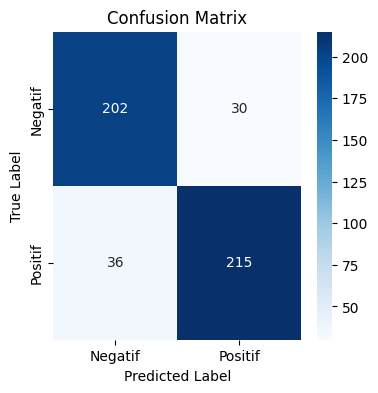

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat label untuk sumbu x dan y
labels = ["Negatif", "Positif"]

# Visualisasi confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
TN, FP, FN, TP = cm.ravel()

print(f'True Positive (TP): {TP}')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')

True Positive (TP): 215
True Negative (TN): 202
False Positive (FP): 30
False Negative (FN): 36


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       232
     Positif       0.88      0.86      0.87       251

    accuracy                           0.86       483
   macro avg       0.86      0.86      0.86       483
weighted avg       0.86      0.86      0.86       483



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk kamus
report_dict = classification_report(y_test, model_pred, output_dict=True)

# Membuat DataFrame dari kamus laporan klasifikasi
df_report = pd.DataFrame(report_dict)

# Menampilkan DataFrame
df_report

<h3> Batas Alpha

In [ ]:
# Tentukan nilai taraf nyata (𝛼)
alpha = 0.1

# Hitung nilai chi-square dan p-value untuk setiap fitur
chi2_values, p_values = chi2(X_tf_idf, y)

# Pilih fitur dengan nilai p-value kurang dari sama dengan nilai taraf (alpha) 0.5
selected_feature_indices = np.where(p_values <= alpha)[0]

#Membuat dataframe fitur terpilih dengan p-value <= 0.5 (FITUR TERPILIH)
feature_names = tf_idf.get_feature_names_out()
selected_df = pd.DataFrame({'Fitur': feature_names[selected_feature_indices],
                            'Chi-Square': chi2_values[selected_feature_indices],
                            'P-Value': p_values[selected_feature_indices]})
selected_df = selected_df.sort_values(by='P-Value')
selected_df

#Menampilkan Dataframe dengan 1270 fitur yang memiliki p-value <= 0.5
selected_df

In [ ]:
# Pilih fitur dengan nilai p-value lebih dari sama dengan nilai taraf (alpha) 0.5 (FITUR TERBUANG)
nonselected_feature_indices = np.where(p_values > alpha)[0]
nonselected_df = pd.DataFrame({'Fitur': feature_names[nonselected_feature_indices],
                               'ChiSquare': chi2_values[nonselected_feature_indices],
                               'PValue': p_values[nonselected_feature_indices]})
nonselected_df = nonselected_df.sort_values(by='PValue')
nonselected_df

In [ ]:
# # Menyimpan hasil DataFrame chi square 0.5 ke dalam file Excel
# selected_df.to_excel('chisquare_0.5_anies.xlsx', index=True)

In [ ]:
# Menyimpan DataFrame dengan fitur yang memiliki p-value <= 0.5
with open('selected_features_df.pickle_anies', 'wb') as output:
    pickle.dump(selected_df, output)

# Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC                           # Import SVM dari scikit-learn
from sklearn.model_selection import train_test_split  # Import fungsi untuk membagi data
from sklearn.metrics import accuracy_score             # Import metrik evaluasi
from joblib import dump

In [ ]:
# Mengambil hanya fitur yang terpilih
selected_features = selected_df['Fitur'].values

In [ ]:
# Mengambil hanya fitur yang terpilih yang ada dalam data_tf_idf
X_selected = data_tf_idf[selected_features].values

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tentukan parameter grid
parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100, 1000]}
]

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi objek GridSearchCV dengan penambahan parameter scoring='accuracy'
grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', verbose=3)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

In [ ]:
best_params = {}
for kernel in ['rbf', 'linear', 'poly']:
    best_params[kernel] = grid_search.cv_results_['params'][np.where(grid_search.cv_results_['param_kernel'] == kernel)[0][grid_search.cv_results_['rank_test_score'][grid_search.cv_results_['param_kernel'] == kernel].argmin()]]

for kernel, params in best_params.items():
    print(f"Best parameters for '{kernel}' kernel:", params)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model_svm = SVC(C=1000, kernel='linear')
# model_svm = SVC(C=40, degree=1, kernel='poly')
model_svm = SVC(C=1, gamma=1, kernel='rbf')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

In [ ]:
model_pred = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

In [ ]:
model_svm

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

In [ ]:
# Jumlah total dataset
total_data_train = len(y_train)
total_data_test = len(y_test)

print("Jumlah Total Dataset (Data Latih):", total_data_train)
print("Jumlah Total Dataset (Data Uji):", total_data_test)

# Jumlah data positif dan negatif dari data latih
print("\nData Latih:")
print("Jumlah Data Positif:", y_train[y_train == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_train[y_train == 'Negatif'].shape[0])

# Jumlah data positif dan negatif dari data uji
print("\nData Uji:")
print("Jumlah Data Positif:", y_test[y_test == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_test[y_test == 'Negatif'].shape[0])

# Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, model_pred)

# Membuat label untuk sumbu x dan y
labels = ["Negatif", "Positif"]

# Visualisasi confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk kamus
report_dict = classification_report(y_test, model_pred, output_dict=True)

# Membuat DataFrame dari kamus laporan klasifikasi
df_report = pd.DataFrame(report_dict)

# Menampilkan DataFrame
df_report

In [ ]:
selected_df['Fitur'].to_csv("hasil_anies.csv")

In [ ]:
data.to_csv("hasil_anies.csv")

# Export Model

In [ ]:
joblib.dump(model, 'svm_anies_2.pkl')

In [ ]:
joblib.dump(tf_idf,'tfidf_anies_2.pkl')